In [23]:
!pip install yfinance
!pip install pandas_datareader

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearnex import patch_sklearn
patch_sklearn()
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader

from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()

# For time stamps
from datetime import datetime


# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Set up End and Start times for data grab
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)


company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name

df = pd.concat(company_list, axis=0)
df.tail(10)

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2024-02-05,170.199997,170.550003,167.699997,170.309998,170.309998,55081300,AMAZON
2024-02-06,169.389999,170.710007,167.649994,169.149994,169.149994,42505500,AMAZON
2024-02-07,169.479996,170.880005,168.940002,170.529999,170.529999,47174100,AMAZON
2024-02-08,169.649994,171.429993,168.880005,169.839996,169.839996,42316500,AMAZON
2024-02-09,170.899994,175.000000,170.580002,174.449997,174.449997,56986000,AMAZON
2024-02-12,174.800003,175.389999,171.539993,172.339996,172.339996,51050400,AMAZON
2024-02-13,167.729996,170.949997,165.750000,168.639999,168.639999,56345100,AMAZON
2024-02-14,169.210007,171.210007,168.279999,170.979996,170.979996,42815500,AMAZON
2024-02-15,170.580002,171.169998,167.589996,169.800003,169.800003,49855200,AMAZON


In [25]:
AAPL.describe()
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2023-02-21 to 2024-02-16
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          250 non-null    float64
 1   High          250 non-null    float64
 2   Low           250 non-null    float64
 3   Close         250 non-null    float64
 4   Adj Close     250 non-null    float64
 5   Volume        250 non-null    int64  
 6   company_name  250 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.6+ KB


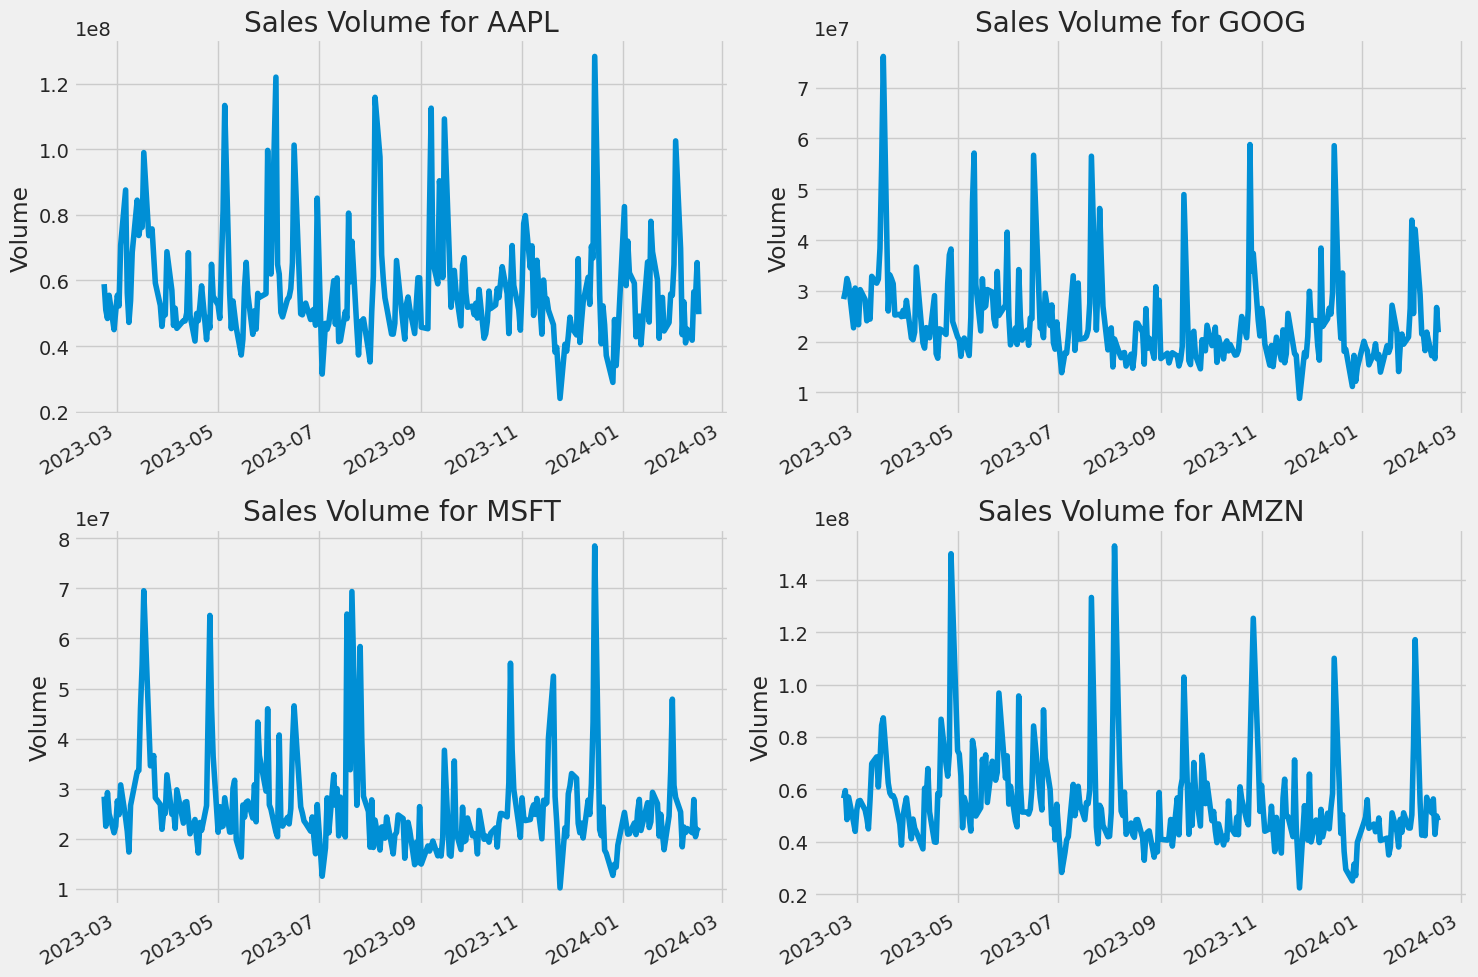

In [26]:
#Volume is the amount of an asset or security that changes hands over some period of time, often over the course of a day. For instance, the stock trading volume would refer to the number of shares of security traded between its daily open and close. Trading volume, and changes to volume over the course of time, are important inputs for technical traders.
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")

plt.tight_layout()

Date
2023-02-21    58867200
2023-02-22    51011300
2023-02-23    48394200
2023-02-24    55469600
2023-02-27    44998500
                ...   
2024-02-12    51050400
2024-02-13    56345100
2024-02-14    42815500
2024-02-15    49855200
2024-02-16    48074600
Name: Volume, Length: 1000, dtype: int64

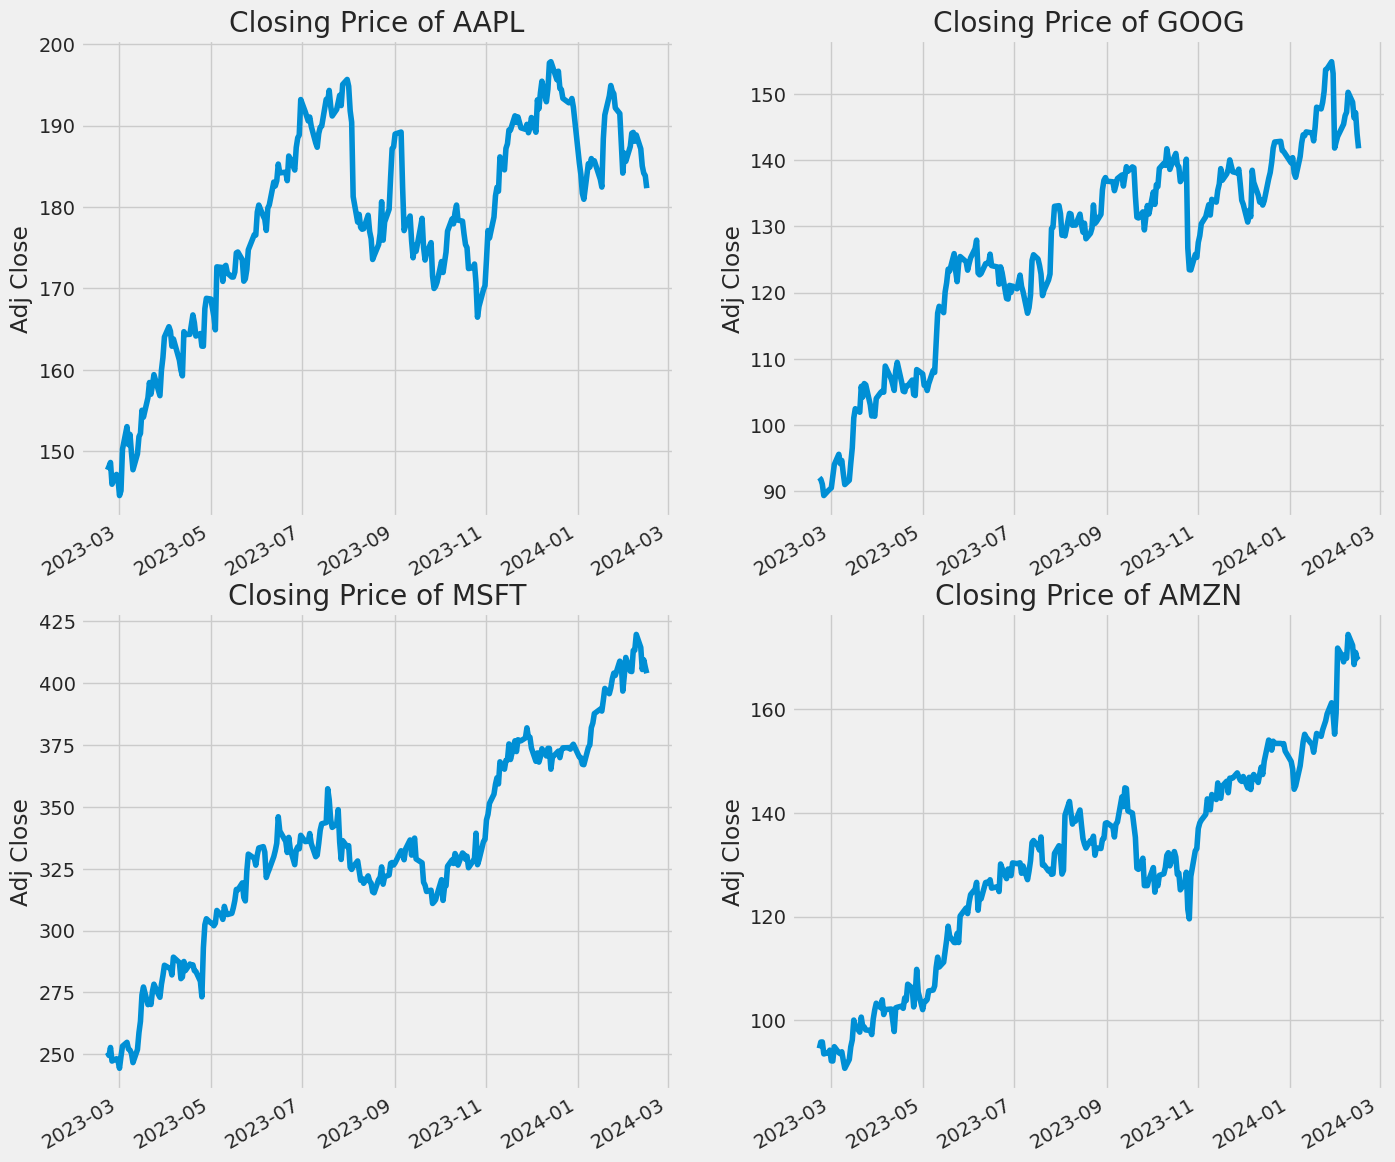

In [27]:
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")
df['Volume']


In [17]:
# Grab all the closing prices for the tech stock list into one DataFrame

closing_df = pdr.get_data_yahoo(tech_list, start=start, end=end)['Adj Close']

# Make a new tech returns DataFrame
tech_data = closing_df.pct_change()
tech_data.head()

[*********************100%%**********************]  4 of 4 completed
/glob/development-tools/versions/oneapi/2024.0.2.1/oneapi/intelpython/lib/python3.9/site-packages/pandas/io/formats/format.py:1595: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/glob/development-tools/versions/oneapi/2024.0.2.1/oneapi/intelpython/lib/python3.9/site-packages/pandas/io/formats/format.py:1596: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/glob/development-tools/versions/oneapi/2024.0.2.1/oneapi/intelpython/lib/python3.9/site-packages/pandas/io/formats/format.py:1596: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


Ticker,AAPL,AMZN,GOOG,MSFT
Date,,,,
2023-02-21,NaN,NaN,NaN,NaN
2023-02-22,0.002896,0.012793,-0.002716,-0.004591
2023-02-23,0.003290,0.000313,-0.007952,0.012962
2023-02-24,-0.018005,-0.024212,-0.018887,-0.021784
2023-02-27,0.008248,0.002781,0.008394,0.003772


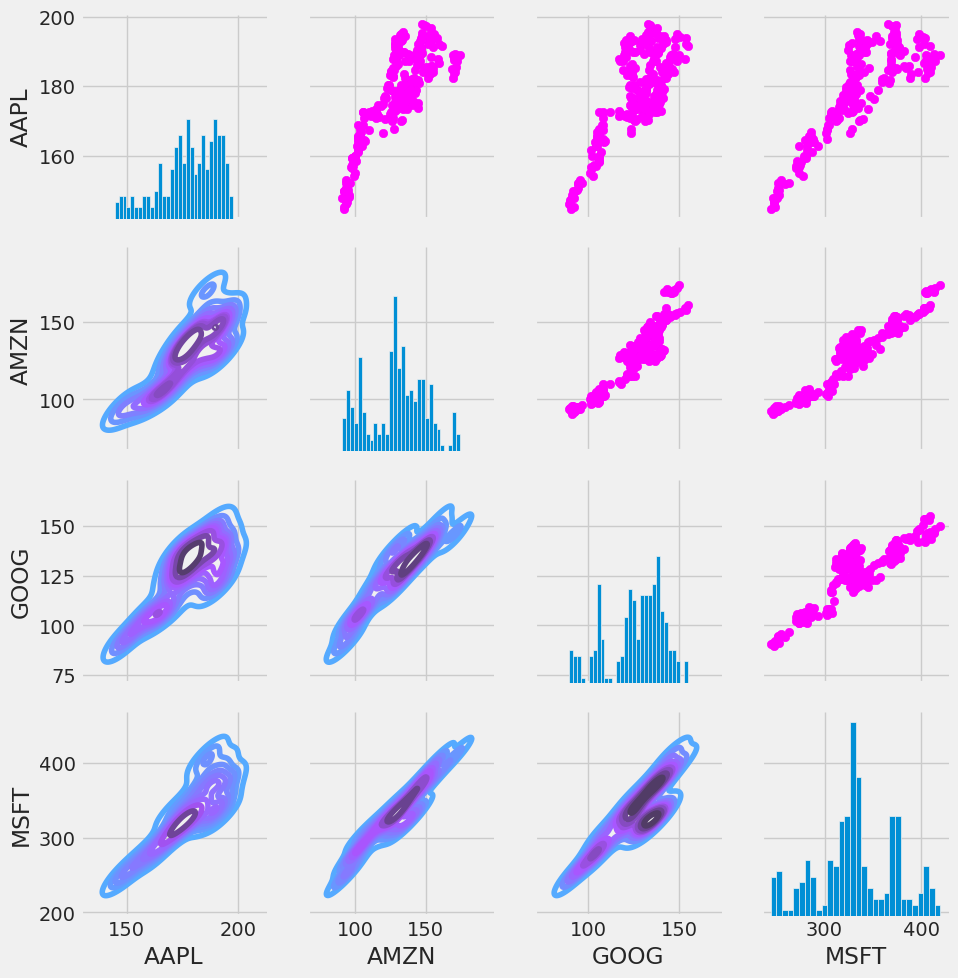

In [18]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='magenta')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

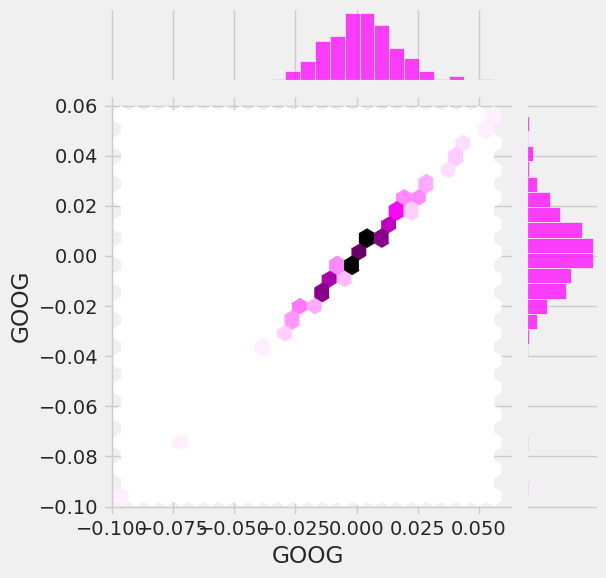

In [19]:
sns.jointplot(x='GOOG', y='GOOG',data=tech_data, kind='hex', color='magenta')

In [20]:
#pred the closing prize
# Get the stock quote
df = pdr.get_data_yahoo('GOOG', start='2000-01-01', end=datetime.now())
# Show teh data
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-08-19,2.490664,2.591785,2.390042,2.499133,2.499133,897427216
2004-08-20,2.515820,2.716817,2.503118,2.697639,2.697639,458857488
2004-08-23,2.758411,2.826406,2.716070,2.724787,2.724787,366857939
2004-08-24,2.770615,2.779581,2.579581,2.611960,2.611960,306396159
2004-08-25,2.614201,2.689918,2.587302,2.640104,2.640104,184645512
...,...,...,...,...,...,...
2024-02-12,149.539993,150.589996,148.559998,148.729996,148.729996,17236100
2024-02-13,146.070007,148.039993,145.110001,146.369995,146.369995,18138500
2024-02-14,147.369995,147.830002,145.554993,147.139999,147.139999,16651800


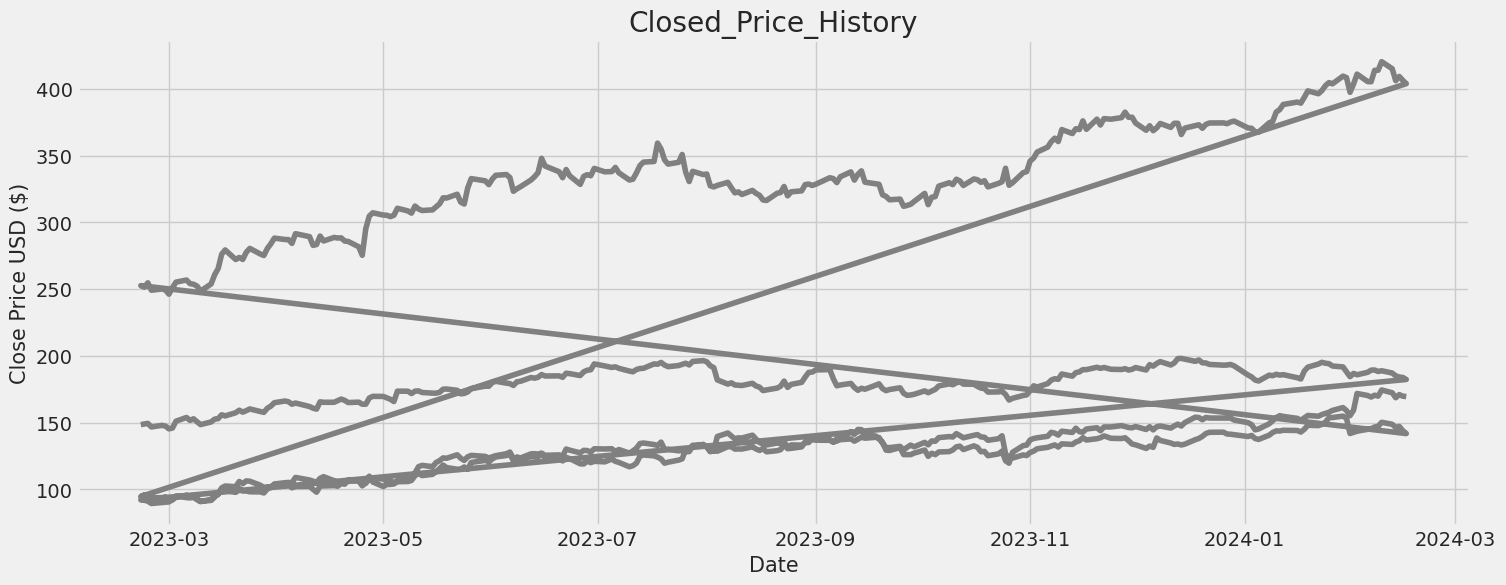

In [28]:
plt.figure(figsize=(16,6))
plt.title('Closed_Price_History')
plt.plot(df['Close'],color='gray')
plt.xlabel('Date', fontsize=15)
plt.ylabel('Close Price USD ($)', fontsize=15)
plt.show()

In [30]:
# Create a new dataframe with only the 'Close column
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len


# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data
#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#x_train = sc.fit_transform(x_train) # x bar equals to (x-mean) by standard deviation(for testing pre existing data)
#x_test = sc.transform(x_test) # x bar equals to (x-xmin) by (x max - x min)...for testing newly acquired data
#Both are for Scaling (Feature Scaling)
#print(x_train)


array([[0.17853261],
       [0.17983094],
       [0.18131038],
       [0.17318844],
       [0.17684179],
       [0.17530195],
       [0.16896136],
       [0.17077297],
       [0.18623189],
       [0.19468601],
       [0.18795293],
       [0.19178744],
       [0.18490338],
       [0.17859301],
       [0.18454108],
       [0.19094203],
       [0.19214979],
       [0.20078505],
       [0.19821861],
       [0.20546497],
       [0.21114131],
       [0.2067633 ],
       [0.21008453],
       [0.21407006],
       [0.20812199],
       [0.2062198 ],
       [0.21564012],
       [0.22044083],
       [0.2281099 ],
       [0.23194445],
       [0.23031404],
       [0.22466787],
       [0.22738529],
       [0.21944445],
       [0.2157307 ],
       [0.21361718],
       [0.23010266],
       [0.22904593],
       [0.22910628],
       [0.23285026],
       [0.23635268],
       [0.23339371],
       [0.22847225],
       [0.22940823],
       [0.22469809],
       [0.22466787],
       [0.23870775],
       [0.242

In [ ]:
# Create the training data set
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.29453313, 0.31366923, 0.33293375, 0.33734318, 0.35172736,
       0.35772081, 0.37244748, 0.37839807, 0.39492275, 0.39770538,
       0.40147269, 0.41585687, 0.41076246, 0.39723447, 0.39595015,
       0.41363073, 0.39916091, 0.38533328, 0.38666038, 0.37788431,
       0.35930476, 0.3674815 , 0.37921141, 0.35733547, 0.35639371,
       0.36636839, 0.36564063, 0.36217303, 0.34235195, 0.3470183 ,
       0.32098978, 0.32000516, 0.35027184, 0.32462859, 0.32595576,
       0.33246284, 0.36046065, 0.32086135, 0.32304464, 0.30069779,
       0.31118624, 0.27689541, 0.26002824, 0.27950683, 0.27278562,
       0.28862539, 0.25257933, 0.23772424, 0.23875164, 0.26238281,
       0.25061004, 0.25129502, 0.26525107, 0.29033777, 0.28691295,
       0.28635646, 0.29705897, 0.27210071, 0.27535425, 0.28635646])]
[0.28314570784589754]

[array([0.29453313, 0.31366923, 0.33293375, 0.33734318, 0.35172736,
       0.35772081, 0.37244748, 0.37839807, 0.39492275, 0.39770538,
       0.40147269, 0.41585687, 0.41

In [ ]:
!pip install keras
!pip install Sequential
!pip install Dense
!pip install LSTM
from keras.models import Sequential
from keras.layers import Dense, LSTM

#LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compiling
model.compile(optimizer='adam', loss='mean_squared_error')

# Training
model.fit(x_train, y_train, batch_size=1, epochs=1)

Defaulting to user installation because normal site-packages is not writeable


In [ ]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

10/10 [==============================] - 0s 40ms/step


13.857156485074647

In [ ]:
from keras import callbacks
class MyEval(callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        my_accuracy_1 = self.model.evaluate(x_train, y_train, verbose=0)[1]
        y_pred = self.model.predict(x_train)
        my_accuracy_2 = np.mean(np.equal(y_train, np.round(y_pred)))
        print("my accuracy 1: {}".format(my_accuracy_1))
        print("my accuracy 2: {}".format(my_accuracy_2))

<ipython-input-60-d46b41d64ddf>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


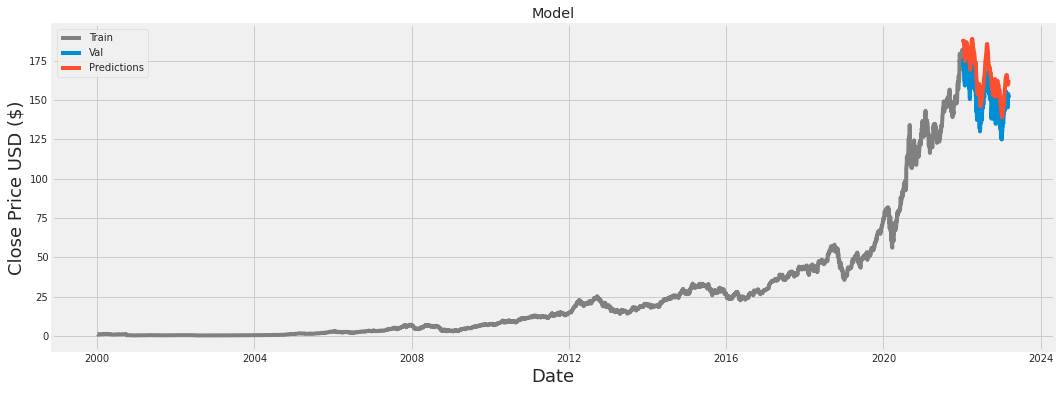

In [ ]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('OUTPUT')
plt.xlabel('Time_Schedule', fontsize=18)
plt.ylabel('Closing price($)', fontsize=18)
plt.plot(train['Close'],color='gray')
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='uTEpper left')
plt.show()

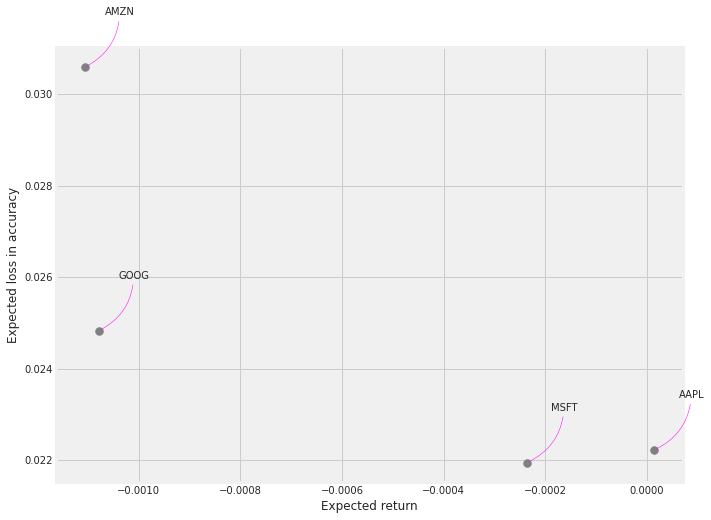

In [ ]:
rets = tech_data.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area,color='gray')
plt.xlabel('Expected return')
plt.ylabel('Expected loss in accuracy')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom',
                 arrowprops=dict(arrowstyle='-', color='magenta', connectionstyle='arc3,rad=-0.3'))